In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.onnx

from sklearn.model_selection import train_test_split
from src.nvidia_cnn import NvidiaCnn
from src.train_nvidia_cnn import run_training
from src.data import get_images_annotations, RobotDataset

### Load & preprocess the data

In [2]:
DATA_PATH = "./dataset"
images_annotations = get_images_annotations(DATA_PATH)

In [3]:
# TODO: preprocess the image in `transform`
dataset = RobotDataset(images_annotations)
train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [4]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

In [5]:
# might be useful - if not feel free to delete 
# for batch in val_loader:
#     images, forward_signals, left_signals = batch
#     print("Batch shape:", images.shape, forward_signals.shape, left_signals.shape)

### NVIDIA CNN

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [7]:
model = NvidiaCnn()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 20

In [8]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

Running training for 20 epochs.


Epoch [0]: 100%|██████████| 190/190 [00:06<00:00, 29.10it/s, loss=0.259] 


Validation loss=0.11119058591808348


Epoch [1]: 100%|██████████| 190/190 [00:05<00:00, 33.22it/s, loss=0.0814]


Validation loss=0.07963406321064839


Epoch [2]: 100%|██████████| 190/190 [00:05<00:00, 33.14it/s, loss=0.11]  


Validation loss=0.12486281101741581


Epoch [3]: 100%|██████████| 190/190 [00:05<00:00, 33.11it/s, loss=0.093] 


Validation loss=0.046691615460111406


Epoch [4]: 100%|██████████| 190/190 [00:05<00:00, 33.07it/s, loss=0.0883]


Validation loss=0.07888736507040439


Epoch [5]: 100%|██████████| 190/190 [00:05<00:00, 33.14it/s, loss=0.0845]


Validation loss=0.08212398103463732


Epoch [6]: 100%|██████████| 190/190 [00:05<00:00, 33.06it/s, loss=0.0558]


Validation loss=0.12544900217167645


Epoch [7]: 100%|██████████| 190/190 [00:05<00:00, 33.11it/s, loss=0.0729]


Validation loss=0.05409396865372171


Epoch [8]: 100%|██████████| 190/190 [00:05<00:00, 33.00it/s, loss=0.028] 


Validation loss=0.040205237383140406


Epoch [9]: 100%|██████████| 190/190 [00:05<00:00, 33.01it/s, loss=0.0384]


Validation loss=0.12019158306424171


Epoch [10]: 100%|██████████| 190/190 [00:05<00:00, 32.79it/s, loss=0.0703]


Validation loss=0.12127375257523444


Epoch [11]: 100%|██████████| 190/190 [00:05<00:00, 32.87it/s, loss=0.0445]


Validation loss=0.08401401761662544


Epoch [12]: 100%|██████████| 190/190 [00:05<00:00, 32.91it/s, loss=0.035] 


Validation loss=0.16564979586307915


Epoch [13]: 100%|██████████| 190/190 [00:05<00:00, 32.91it/s, loss=0.0385]


Validation loss=0.06657939192873152


Epoch [14]: 100%|██████████| 190/190 [00:05<00:00, 32.86it/s, loss=0.0275]


Validation loss=0.06659572952188765


Epoch [15]: 100%|██████████| 190/190 [00:05<00:00, 32.79it/s, loss=0.0177]


Validation loss=0.07244021107531788


Epoch [16]: 100%|██████████| 190/190 [00:05<00:00, 32.57it/s, loss=0.0304]


Validation loss=0.22269114570390566


Epoch [17]: 100%|██████████| 190/190 [00:05<00:00, 32.85it/s, loss=0.054] 


Validation loss=0.15531989894316794


Epoch [18]: 100%|██████████| 190/190 [00:05<00:00, 32.83it/s, loss=0.0294] 


Validation loss=0.14375910209295525


Epoch [19]: 100%|██████████| 190/190 [00:05<00:00, 32.66it/s, loss=0.0307] 


Validation loss=0.23462866606292632


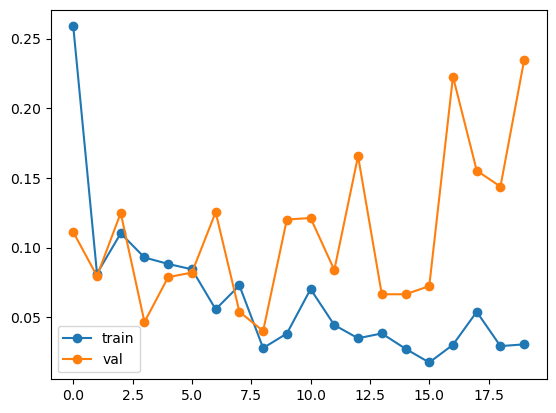

In [10]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

### Export to onnx

In [ ]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model.onnx",
                  export_params=True,
                  opset_version=11)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



### Train Model #2
TODO